В этом примере я буду использовать модель, основанную на сверточных нейронных сетях, с добавлением дополнительных сверточных слоев, использованием Dropout для предотвращения переобучения и регуляризации.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7512 - loss: 0.8254 - val_accuracy: 0.8729 - val_loss: 0.4173
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8764 - loss: 0.4065 - val_accuracy: 0.8872 - val_loss: 0.3630
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8885 - loss: 0.3624 - val_accuracy: 0.8975 - val_loss: 0.3403
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9011 - loss: 0.3270 - val_accuracy: 0.9058 - val_loss: 0.3229
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9062 - loss: 0.3125 - val_accuracy: 0.9056 - val_loss: 0.3106
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9115 - loss: 0.2966 - val_accuracy: 0.9117 - val_loss: 0.3006
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9159 - loss: 0.2805 - val_accuracy: 0.9141 - val_loss: 0.2872
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9191 - loss: 0

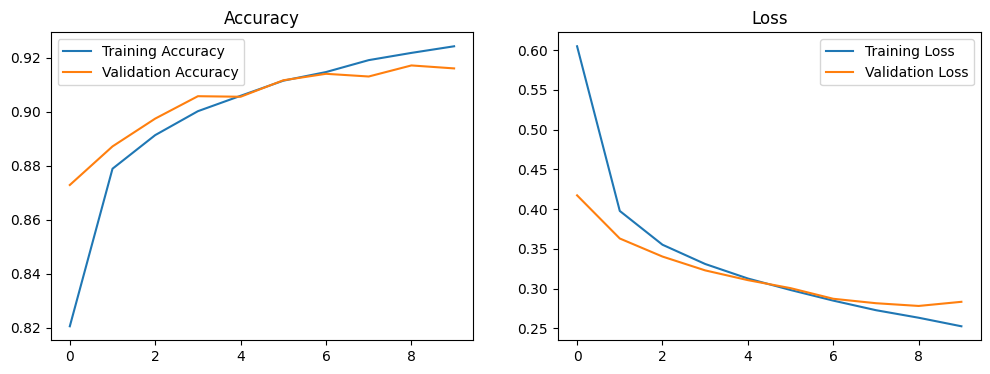

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

In [2]:
# Импорт необходимых библиотек
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и подготовка данных
# Загружаем данные Fashion-MNIST, нормализуем их 
# и преобразуем метки классов в категориальный формат.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Определение архитектуры модели
# Создаем модель с несколькими сверточными слоями, 
# добавляем Dropout для предотвращения переобучения 
# и регуляризацию L2 для весов полносвязных слоев.



input_shape = (28, 28, 1)
model = Sequential()

# Первый сверточный слой с 32 фильтрами, padding='same' для сохранения размерности
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
          padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой с 64 фильтрами
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Третий сверточный слой с 128 фильтрами
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout слой для предотвращения переобучения
model.add(Dropout(0.5))

# Преобразование в одномерный массив
model.add(Flatten())

# Полносвязный слой с 128 нейронами
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

# Выходной слой с 10 нейронами (для 10 классов)
model.add(Dense(10, activation='softmax'))

# Компиляция модели
# Компилируем модель с оптимизатором Adam, 
# функцией потерь categorical_crossentropy и метрикой accuracy.
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
# Обучаем модель на тренировочных данных 
# с использованием валидационных данных для мониторинга.
history = model.fit(x_train, y_train, batch_size=32,
                    epochs=10, validation_data=(x_test, y_test))

# Визуализация результатов обучения
# Визуализируем точность и потери модели во время обучения и валидации.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Вывод информации о модели
# Выводим информацию о структуре модели с помощью метода summary().
model.summary()

Это улучшенная версия модели, которая включает в себя дополнительные сверточные слои, Dropout для предотвращения переобучения и регуляризацию для улучшения обобщающей способности модели.

---

Изучив документацию TensorFlow и дополнительные ресурсы, можно выделить несколько полезных команд и функций, которые могут быть полезны для разработки и улучшения моделей машинного обучения. Эти команды не были разобранны на уроке, но они могут значительно улучшить ваш опыт работы с TensorFlow.


1. **tf.keras.callbacks**
Callbacks позволяют вам вставлять код, который будет выполняться в определенные моменты процесса обучения. Это может быть полезно для мониторинга процесса обучения, сохранения модели в процессе обучения, или для ранней остановки обучения, если модель перестает улучшаться.

```python
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Сохранение лучшей модели
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Ранняя остановка обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Использование callbacks при обучении модели
model.fit(x_train, y_train, epochs=10, callbacks=[checkpoint, early_stopping])
```

2. **tf.keras.regularizers**
Регуляризация помогает предотвратить переобучение модели, добавляя штраф к весам модели. Примеры регуляризаторов включают L1, L2, и L1_L2.

```python
from tensorflow.keras.regularizers import l1, l2, l1_l2

# Применение L2 регуляризации к полносвязному слою
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
```

3. **tf.keras.metrics**
Метрики позволяют оценивать производительность модели во время обучения и тестирования. TensorFlow предлагает широкий спектр метрик, включая accuracy, AUC, Precision, Recall, и многие другие.

```python
from tensorflow.keras.metrics import AUC, Precision, Recall

# Использование метрик при компиляции модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(), Precision(), Recall()])
```

4. **tf.keras.losses**
TensorFlow предоставляет различные функции потерь, которые можно использовать в зависимости от задачи обучения. Например, categorical_crossentropy для задач классификации, mean_squared_error для задач регрессии, и binary_crossentropy для бинарной классификации.

```python
from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, BinaryCrossentropy

# Пример использования функции потерь
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
```
Эти команды и функции могут значительно расширить возможности моделей машинного обучения, позволяя более гибко управлять процессом обучения и оценивать производительность модели.